In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as random


#### Lecture 16:

- Learn how to use the **seaborn** package to produce beautiful plots

- Learn about kernel density estimates

- Learn appropriate ways of representing different types of data

### seaborn

In this lecture, we will  learn about **seaborn**. **seaborn** is a package with many tools for data visualization. It allows you to make pretty plots. Almost anything in **seaborn** can be done using **matplotlib**, but with **seaborn**'s built-in functions you can reduce a lot of **matplotlib** code down to a single line.  **seaborn** isn't just a pretty face.  Its real power is in statistical data analysis. It has a lot of functions built in for visualizing the distribution of your data, for example.

Let's take a look at some of the plots we can make with this package. We can import it using:

In [ ]:
import seaborn as sns

### Unusual distributions,  kernel density estimates and jointplots

In some cases, we have distributions of data that don't look like a simple (e.g., normal) distribution, for example,  the data could be  bimodal or have skewed shaped distributions.

Let's create some synthetic bimodal data by drawing from two separate normal/lognormal distributions and combine the two into two  bimodal data sets.  We do this by drawing from **random.normal( )** twice for  two normal distributions ($x_1,x_2$) and twice from **random.lognormal( )** for two lognormal distributions ($y_1,y_2$).


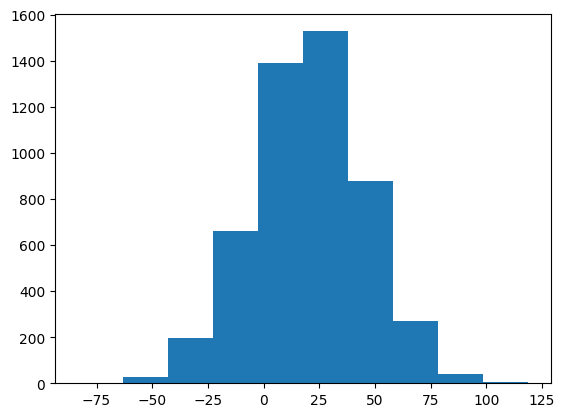

In [ ]:
plt.hist(xdata1)
plt.show()

In [ ]:
xdata1=random.normal(20,25,5000) # first x draw
xdata2=random.normal(100,25,5000) # second x draw
ydata1=random.lognormal(2,0.1,8000) # first y draw
ydata2=random.lognormal(3,0.1,2000) # second y draw
xdata=np.append(xdata1,xdata2) # combine the two x data sets
ydata=np.append(ydata1,ydata2) # combine the two y data sets

When we plot our xdata as a histogram, we can see that we have a broadly bimodal distribution. For fun, let's also plot the mean of the distribution as a red line.

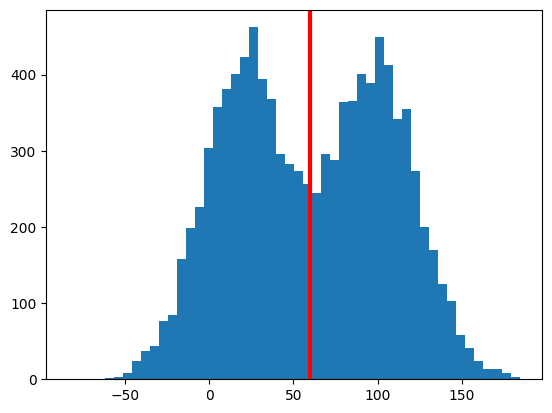

In [ ]:
# make the histogram
plt.hist(xdata,bins=50);
# put on a heavy (linewidth=3) vertical red line at the mean of xdata
plt.axvline(np.mean(xdata),color='red',linewidth=3);   # axvline adds a vertical line to a Matplotlib plot

We can see that our mean lies right between the twin peaks. Describing this distribution with  statistics  mean for normal distributions (mean or standard deviation) is just plain wrong.

Another way to represent the distribution of a set of datapoints is known as a _kernel density estimate_ (kde). This  places a 'kernel' (an assumed distribution at the data point level - usually a normal distribution) at each data point and then sums up  the contributions from all the data points.  Kernel density estimates avoid the awkwardness of choice of bin size associated with histograms, for example. (We just picked 50 in the plot above - why 50?).  

Here are some data represented on a bar plot in the lefthand plot.  And on the right, we illustrate the idea behind kernel density estimates. The black lines are the locations of individual datapoints and the red dashed lines are the kernels at each point. The heavy blue line is the kernel density estimate (the sum of all the red dashed lines).

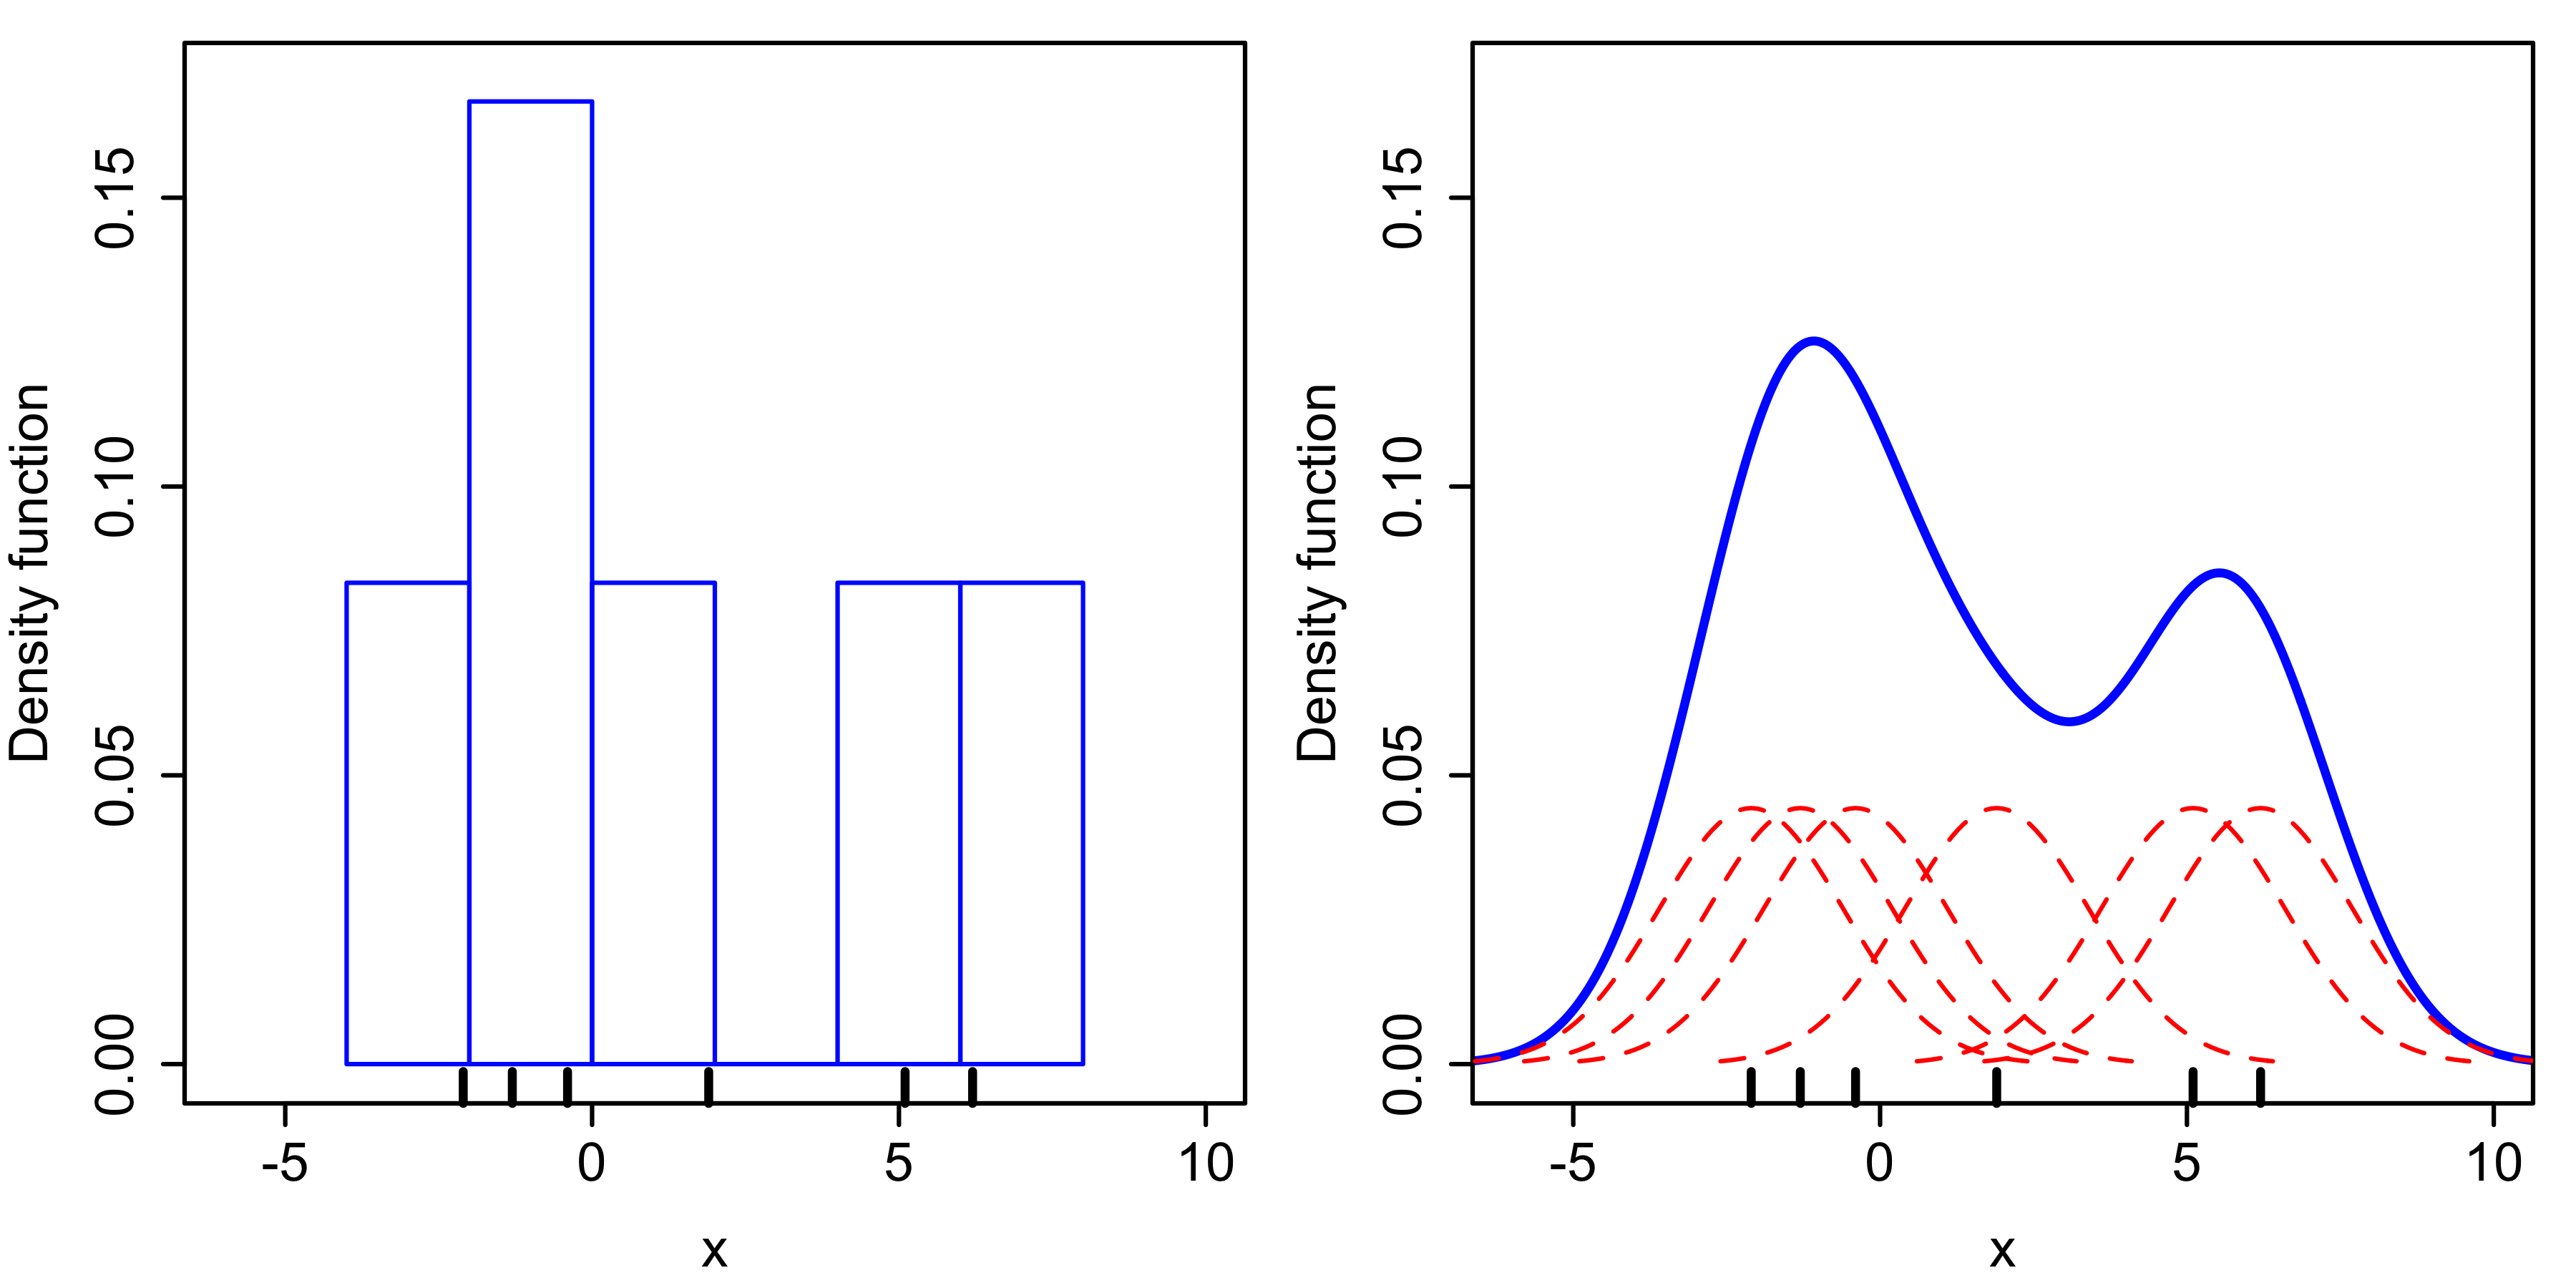

In [ ]:
Image('../Figures/KDE.png',width=600)

\[_Source:_ https://commons.wikimedia.org/wiki/File:Comparison_of_1D_histogram_and_KDE.png _Wikimedia Creative Commons_\]

Happily, we can plot kernel density estimates using the **sns.kdeplot( )** function. The **fill** argument allows us to shade the area underneath the curve. By the way, in  **matplotlib**, the same thing can be achieved using the function **plt.fill_between**.

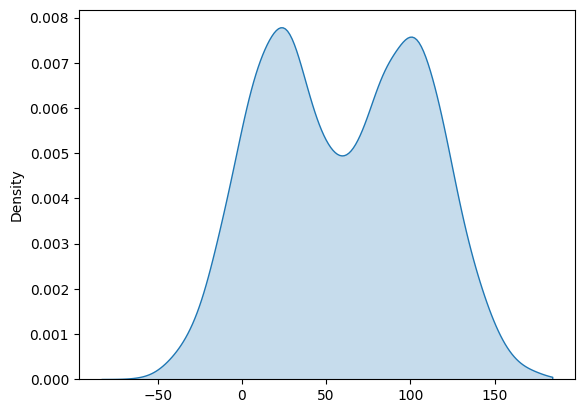

In [ ]:
sns.kdeplot(xdata,fill=True,cut=0);  # cut determines how far the evaluation grid extends past the extreme datapoints. When set to 0, truncate the curve at the data limits.

Well that was fairly painless!  We can also plot the kernel density estimate and the histogram on top of one another using the **sns.histplot( )** function. Previously, you could use **sns.distplot()**, but it was depreciated in v0.11.0. Learn more at https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751.

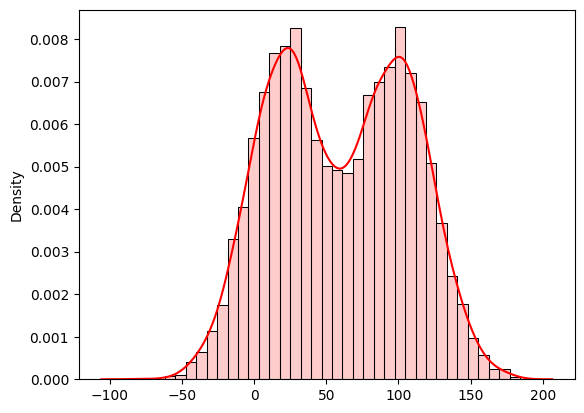

In [ ]:
sns.histplot(xdata, kde=True,stat="density", kde_kws=dict(cut=3),alpha=0.2,color='red');  # alpha: transparency level. 0: fully transparent. 1: fully opaque


As you can see, this is a lot quicker than how we were plotting our distribution in the lecture on statistics!

With our $ydata$ we can see that we also have a bimodal distribution, but there are far fewer data points in the wider mode (we only used 2000 of our 10000 points for this mode).

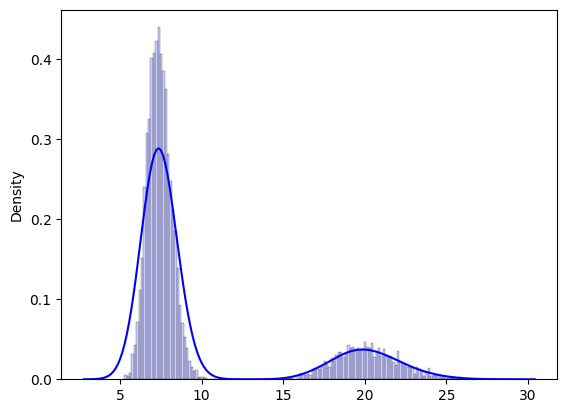

In [ ]:
sns.histplot(ydata, kde=True,stat="density", kde_kws=dict(cut=3),alpha=.2,color='blue');


What if our data had both $x$ and $y$ components. For example, measurements of length and width from a set of shark teeth with two species in it.   How would we visualize it? Let's just try plotting the $x$ data on the x axis and $y$ data on the y axis as dots on a regular **matplotlib** plot.

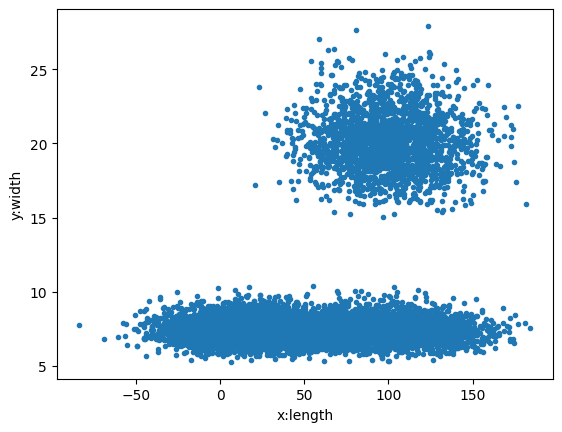

In [ ]:
plt.plot(xdata,ydata,'.')
plt.xlabel('x:length')
plt.ylabel('y:width')
plt.show()

It's much harder to see the bimodal distribution in the $x$ data in this case, and we can't really see that there are so much fewer  data points in the $y$ data mode than the more tightly clustered one. Also, this is not a plot you would expect from length and width dimensions of teeth from a single species - wouldn't that be a linear plot?

When we have a lot of datapoints, this type of plot gives us  no easy way to estimate data density.
Fortunately, **seaborn** includes a cool plot called '**sns.jointplot( )**. This combines the histograms and the scatter plot into a single graph.

To see more examples of figures created by **sns.jointplot()**, click [here](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

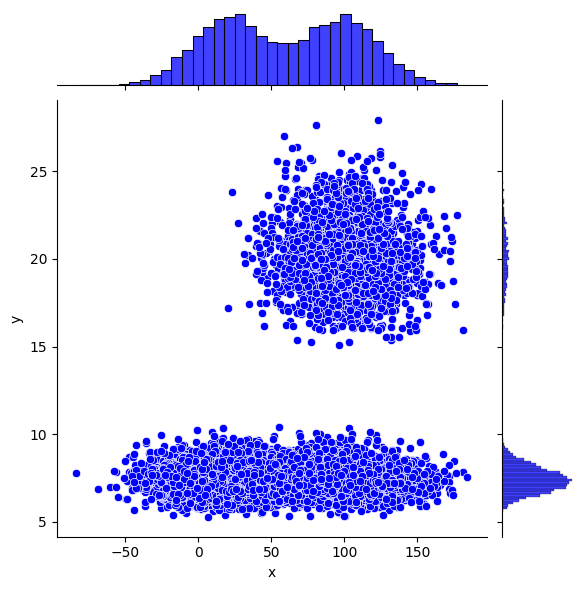

In [ ]:
df = pd.DataFrame({'x': xdata, 'y': ydata})
sns.jointplot(data=df,x="x", y="y",kind='scatter',color='blue');

Jointplot can also do kernel density estimates! The **kind** argument on this plot gives us many other options plotting data as well:

Let's try the **kind=kde** option.  (Warning, doing a 2d kde plot like this is a lot of work so this cell might take a while to run).

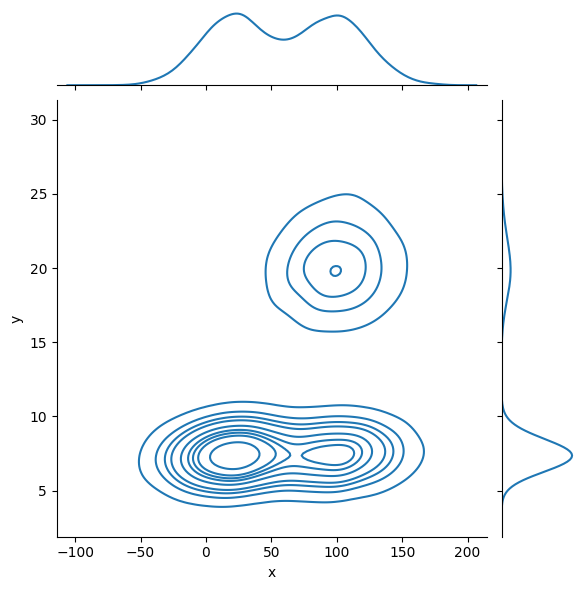

In [ ]:
sns.jointplot(data=df,x="x", y="y",kind='kde');

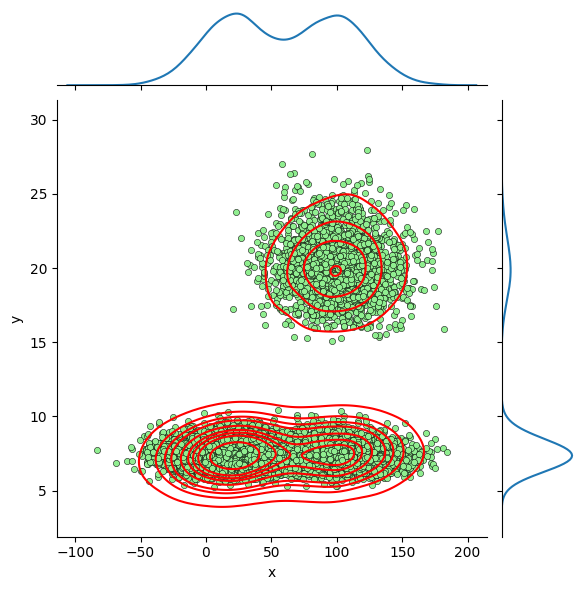

In [ ]:
# Create the joint plot with kernel density estimate
g = sns.jointplot(data=df, x="x", y="y", kind='kde', joint_kws={'color':'red'})
# Add a scatter plot on top of the KDE plot
g.plot_joint(sns.scatterplot, color="lightgreen", s=20, edgecolor="black")

plt.show()

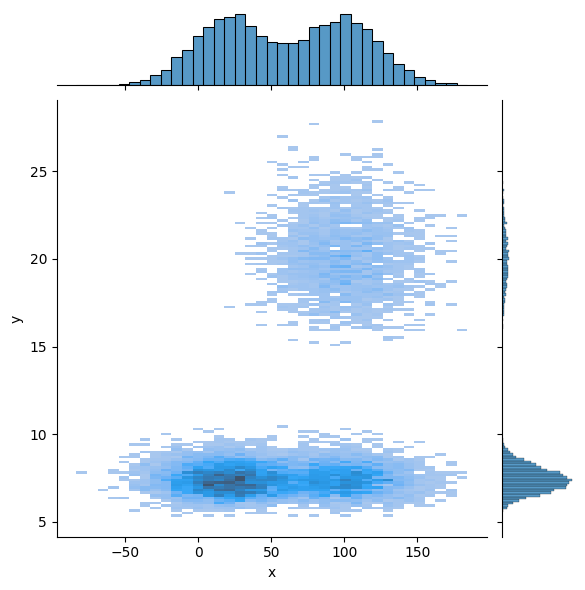

In [ ]:
sns.jointplot(data=df,x="x", y="y",kind='hist');

Another type of plot that looks nice is the hexbin plot (kind of like a hexagonal 2d histogram)

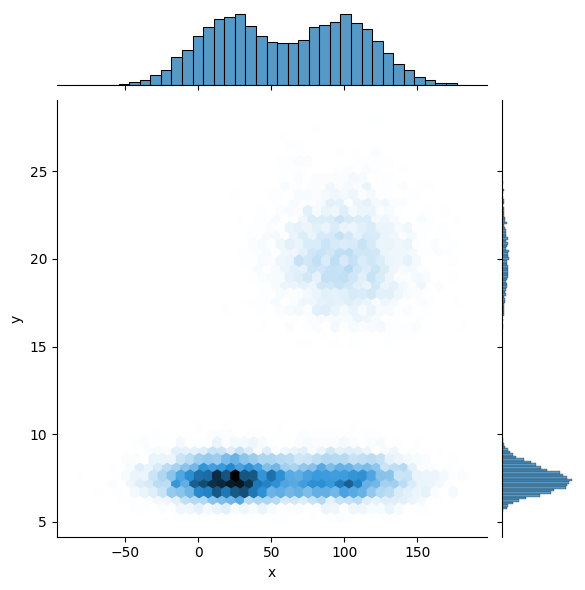

In [ ]:
sns.jointplot(df,x='x',y='y',kind='hex');

### Multi dimensional data and pairplots

What if you have data with more than two dimensions? A good example of this is with isotopic data from Ocean Island Basalts.  Isotopic systems are used to "finger-print" different sources of melt  in the mantle.  It is used to characterize what is deep in the Earth using what gets brought up to form the ocean islands. The discipline of study isotropic sytems is called isotope geochemistry. It is an aspect of geology based upon the study of natural variations in the relative abundances of isotopes of various elements. Variations in isotopic abundance are measured by isotope ratio mass spectrometry, and can reveal information about the ages and origins of rock, air or water bodies, or processes of mixing between them.

By now there are data available for many different  isotopic systems.  Here we take a look at a small sample of what is in  the [GeoRoc database (http://georoc.mpch-mainz.gwdg.de/georoc/)](http://georoc.mpch-mainz.gwdg.de/georoc/) for ocean island basalts.  

In [ ]:
MantleArray=pd.read_csv('../Datasets/GeoRoc/MantleArray_OIB.csv')
MantleArray.head()

,CITATION,EPSILON_HF,EPSILON_ND,HF176_HF177,LAND/SEA (SAMPLING),LATITUDE (MAX.),LATITUDE (MIN.),LOCATION,LOCATION COMMENT,LONGITUDE (MAX.),...,PB208_PB204,ROCK NAME,ROCK TYPE,SAMPLE NAME,SAMPLING TECHNIQUE,SR87_SR86,TECTONIC SETTING,TYPE OF MATERIAL,UNIQUE_ID,Year
0,[60] STILLE P. (1986),14.534010,7.607708,0.283196,SUBAERIAL,19.83,19.83,HAWAIIAN ISLANDS,NaN,-155.42,...,38.017,ANKARAMITE,VOLCANIC ROCK,samp. 79MK1,OUTCROP,0.70347,OCEAN ISLAND,WHOLE ROCK,107-79MK1,1986
1,[60] STILLE P. (1986),10.538041,6.378770,0.283083,SUBAERIAL,22.00,22.00,HAWAIIAN ISLANDS,NAPALI MEMBER,-159.50,...,37.803,THOLEIITE,VOLCANIC ROCK,samp. KAU-1,OUTCROP,0.70384,OCEAN ISLAND,WHOLE ROCK,5-KAU-1,1986
2,[60] STILLE P. (1986),11.033117,6.281235,0.283097,SUBAERIAL,22.00,22.00,HAWAIIAN ISLANDS,NAPALI MEMBER,-159.50,...,37.962,THOLEIITE,VOLCANIC ROCK,samp. 1D872-2,OUTCROP,0.70364,OCEAN ISLAND,WHOLE ROCK,NaN,1986
3,[60] STILLE P. (1986),12.164719,5.696027,0.283129,SUBAERIAL,21.15,21.15,HAWAIIAN ISLANDS,NaN,-156.97,...,37.751,THOLEIITE,VOLCANIC ROCK,samp. 71WMOL-1,OUTCROP,0.70378,OCEAN ISLAND,WHOLE ROCK,782-71WMOL-1,1986
4,[60] STILLE P. (1986),15.135173,5.891097,0.283213,SUBAERIAL,21.16,21.16,HAWAIIAN ISLANDS,NaN,-157.23,...,37.754,THOLEIITE,VOLCANIC ROCK,samp. 71WMOL-3,OUTCROP,0.70376,OCEAN ISLAND,WHOLE ROCK,783-71WMOL-3,1986


Sr: Strontium; Nd: Neodymium; Hf: Hafnium;

There are lots of different isotope ratios available. In this lecture, we focus on four different isotopic ratios:  $^{87}$Sr/$^{86}$Sr , $^{206}$Pb/$^{204}$Pb , $ \varepsilon$ Nd and $ \varepsilon$ Hf. (The ratios with an $ \varepsilon$ are the isotope ratios relative to a standard value in parts per 10000, this allows you to see the variation better as it is normally very small).  

So, how do you plot multi-dimensional data?  Our new plotting buddy **seaborn** has a function for multi-dimensional data known as the **sns.pairplot( )**. This makes a plot that takes data with many  dimensions and plots each possible two dimensional combination against one another in a grid where each of the rows and columns represents a dimension. When a particular dimension is plotted against itself, however, it gives the kernal density estimates for the different data types (set by the keyword argument, **hue**). In this case we will be using $LOCATION$ to group the data).  

In our isotopic example, the top row plots $ \varepsilon$ Nd against all of the other isotope ratios in turn with the first plot on the left being the kernal density plot for each location with each in a different color.

Let's see it in action (warning, cell may take a while to run because of the large number of locations):

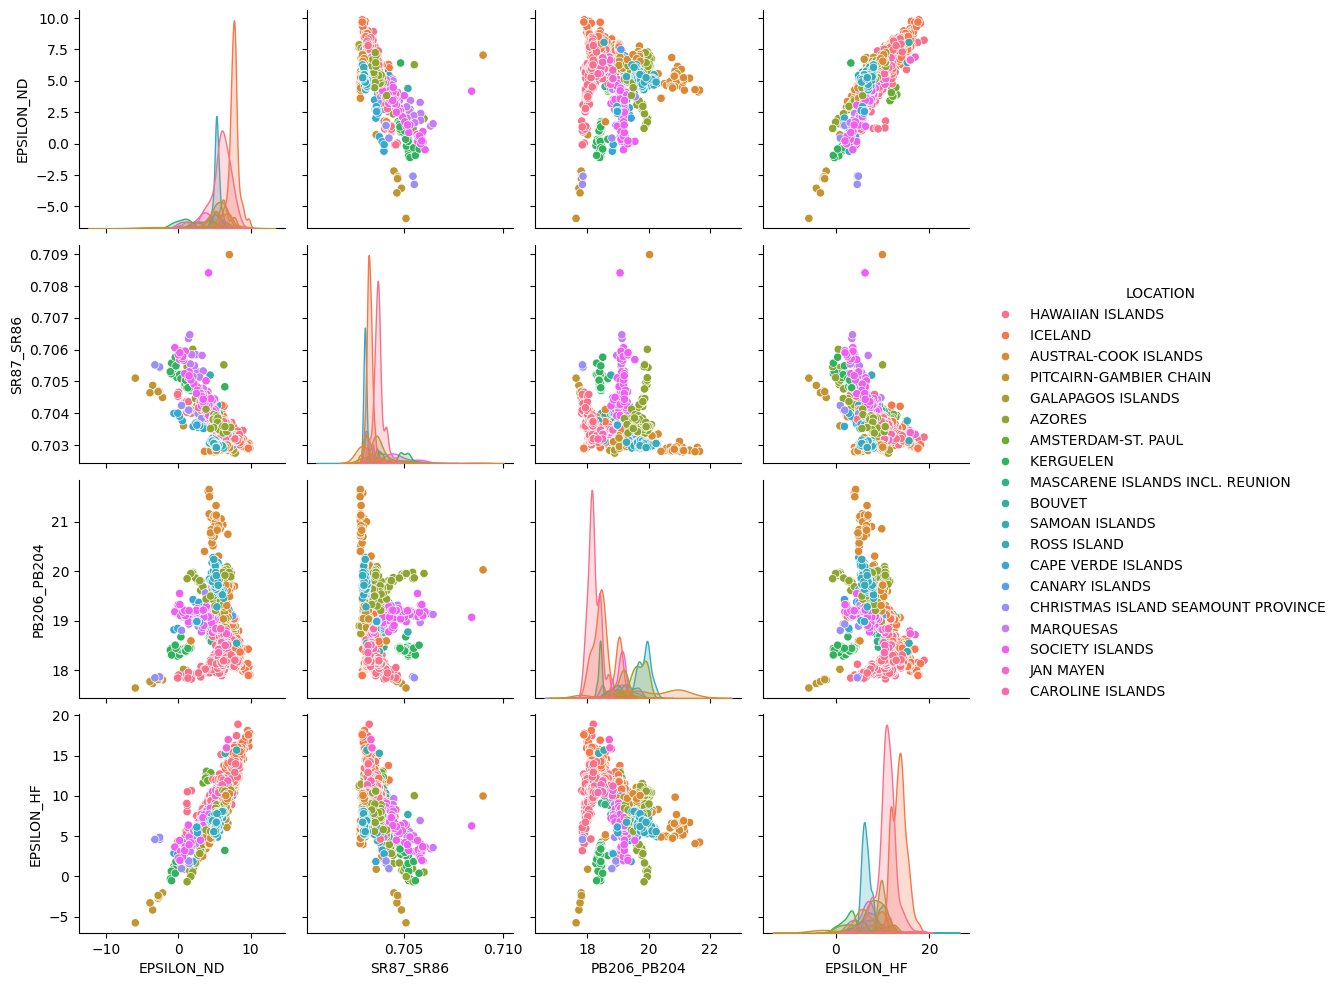

In [ ]:
sns.pairplot(MantleArray,\
             vars=['EPSILON_ND','SR87_SR86','PB206_PB204','EPSILON_HF'],\
             hue='LOCATION');

**sns.pairplot( )** gives us an interesting way of seeing trends in multidimensional space. Some ocean islands have quite different isotopic compositions from others! It's important to note that some projections of these data (e.g.  $^{206}$Pb/$^{204}$Pb vs $ \varepsilon$ Nd) show this effect more prominently whereas others, like  $ \varepsilon$ Nd vs  $ \varepsilon$ Hf, are more subtle. In this plot (second from the bottom on the left), the Austral-Cook Islands are all the way on the top to the right, and Pitcairn is way at the bottom to the left.

It might be surprising to some of you who know a little geophysics  that there is  heterogeneity between different ocean islands. You might have thought that the mantle is very well mixed by convection. Many geochemists believe that the source regions for the plumes that form these basalts have different compositions because subduction brings down crustal material with different compositions to the base of the mantle, and this material then upwells in plumes that form the ocean islands. According to that hypothesis, the variation in isotopic ratios we see here comes from mixing between these recycled crustal end members and a mantle composition.

We will look further at this dataset when we learn how to plot things in three dimensions and also when we  group the data into 'end-members' using  a bit of machine learning.

### Box and whisker,  violin plots and strip plots

The kernal density estimate plots in the element versus itself plots in the **sns.pairplot( )** plot example above plot all of the isotopic data on one plot.  This doesn't really allow us to appreciate fully the variability at a given location.  There are two additional plots that might give us a better idea of that:  the 'box and whisker' plot (very popular, but I hate them) and the 'violin' plots (love these!).  

**seaborn** has functions (actually classes)  for both of these, **sns.boxplot( )** and **sns.violinplot( )**.  In these plots, we can also place the data (and not just the distributions) and can use the handy **sns.swarmplot( )** to spread out the data along the x-axis so that we can see them better.  We'll go through each of these tricks in the following.  

First, the boxplot:


In [ ]:
help(sns.boxplot)

Let's look at the $\epsilon$ Hf data as a function of location (similar to the lower right hand corner plot in the pairplot example above:

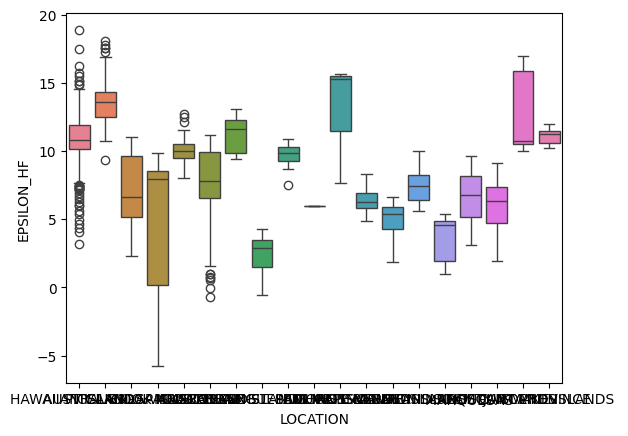

In [ ]:
box=sns.boxplot(data=MantleArray,x='LOCATION',y='EPSILON_HF', hue='LOCATION')

Oh my. Pretty plot, but the x axis tick labels overlap so badly we can't even see them.  To rotate them, we use the figure object as we have done before.  Instead of **fig**, we will call the figure object **box** in the following.  This will let us use **plt.setp( )** to set properties (such as the x tick labels) on our plot object, **box**.  

In [ ]:
help(plt.setp)

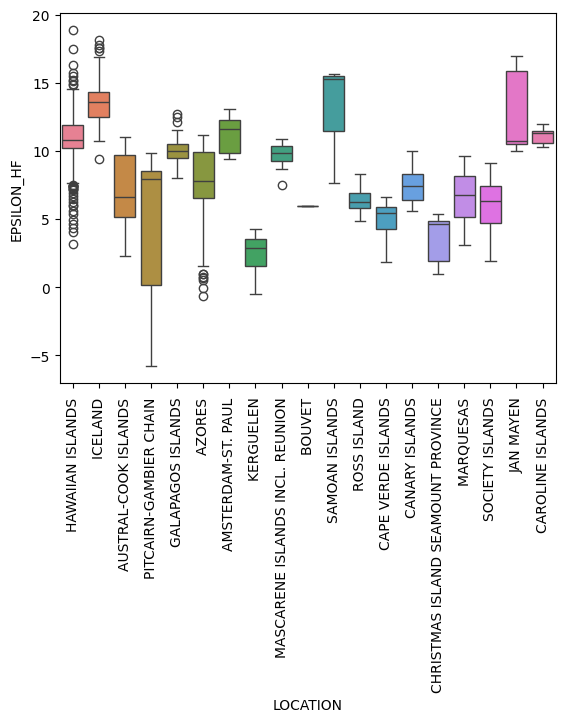

In [ ]:
box=sns.boxplot(data=MantleArray,x='LOCATION',y='EPSILON_HF',hue='LOCATION')
plt.setp(box.get_xticklabels(), rotation=90);

The x axis labels are better, but the plot still doesn't look great. The black diamonds are known as 'fliers' and could represent "outliers".  

As we have some pretty large "outliers" in this dataset, we need to either limit the range on the y axis or by making the plot larger. These fliers are annoying (although they represent something that maybe we shouldn't be ignoring...).  It is possible to  exclude them from the box and whisker plot,  using the argument **fliersize=0**.

You need to be aware that this can be a problematic practice as you are effectively hiding data from the viewer.  Personally, I wouldn't do it...  But lot's of folks do, so here is how:

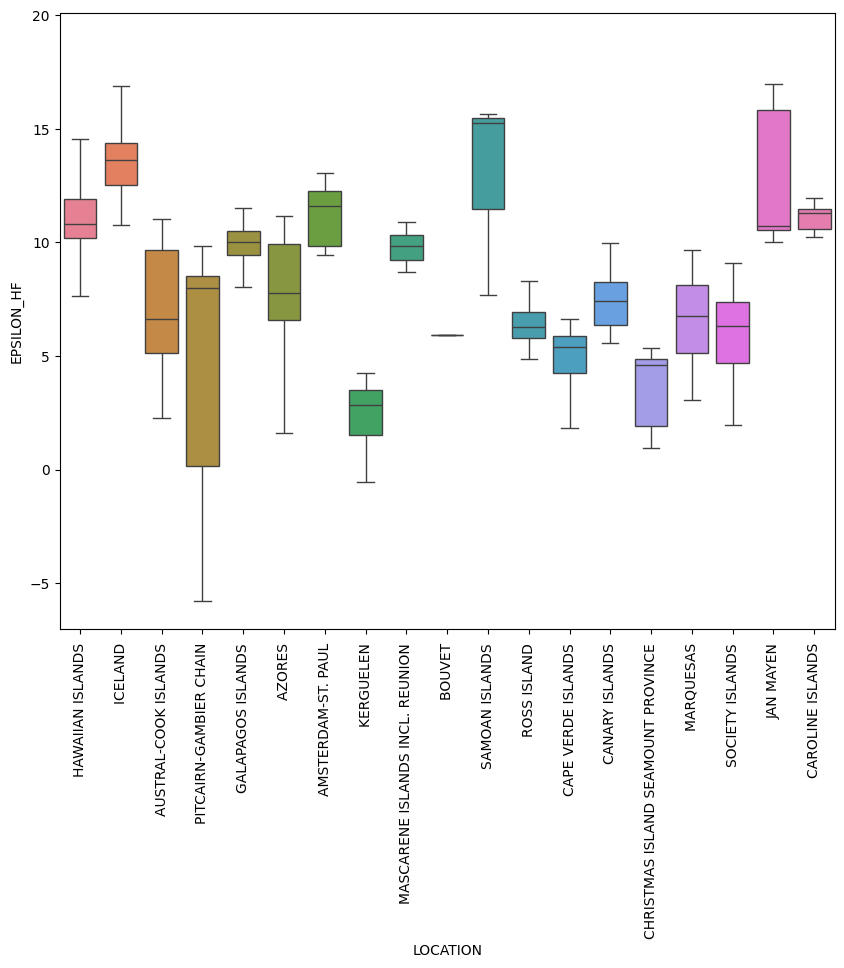

In [ ]:
plt.figure(figsize=(10,8)) # make the plot bigger
box=sns.boxplot(data=MantleArray,x='LOCATION',y='EPSILON_HF',hue='LOCATION',fliersize=0)
plt.setp(box.get_xticklabels(), rotation=90);


See!  This looks much better.  But looks can be deceiving!  


Alternatively, we can put the data back on, but use a white dot with a black edge, and spread them out so we can see them.  
In order to see the data points that overlap one another, **seaborn**  has an option to plot the data points in a cloud using the function **sns.stripplot( )**.  Here we do both of these (and also make the points white with a black edge). The argument **alpha=0.5** is used here to make the points semi transparent. (**alpha** sets 'opacity' so **alpha=1** is fully opaque and **alpha=0**, points are invisible).

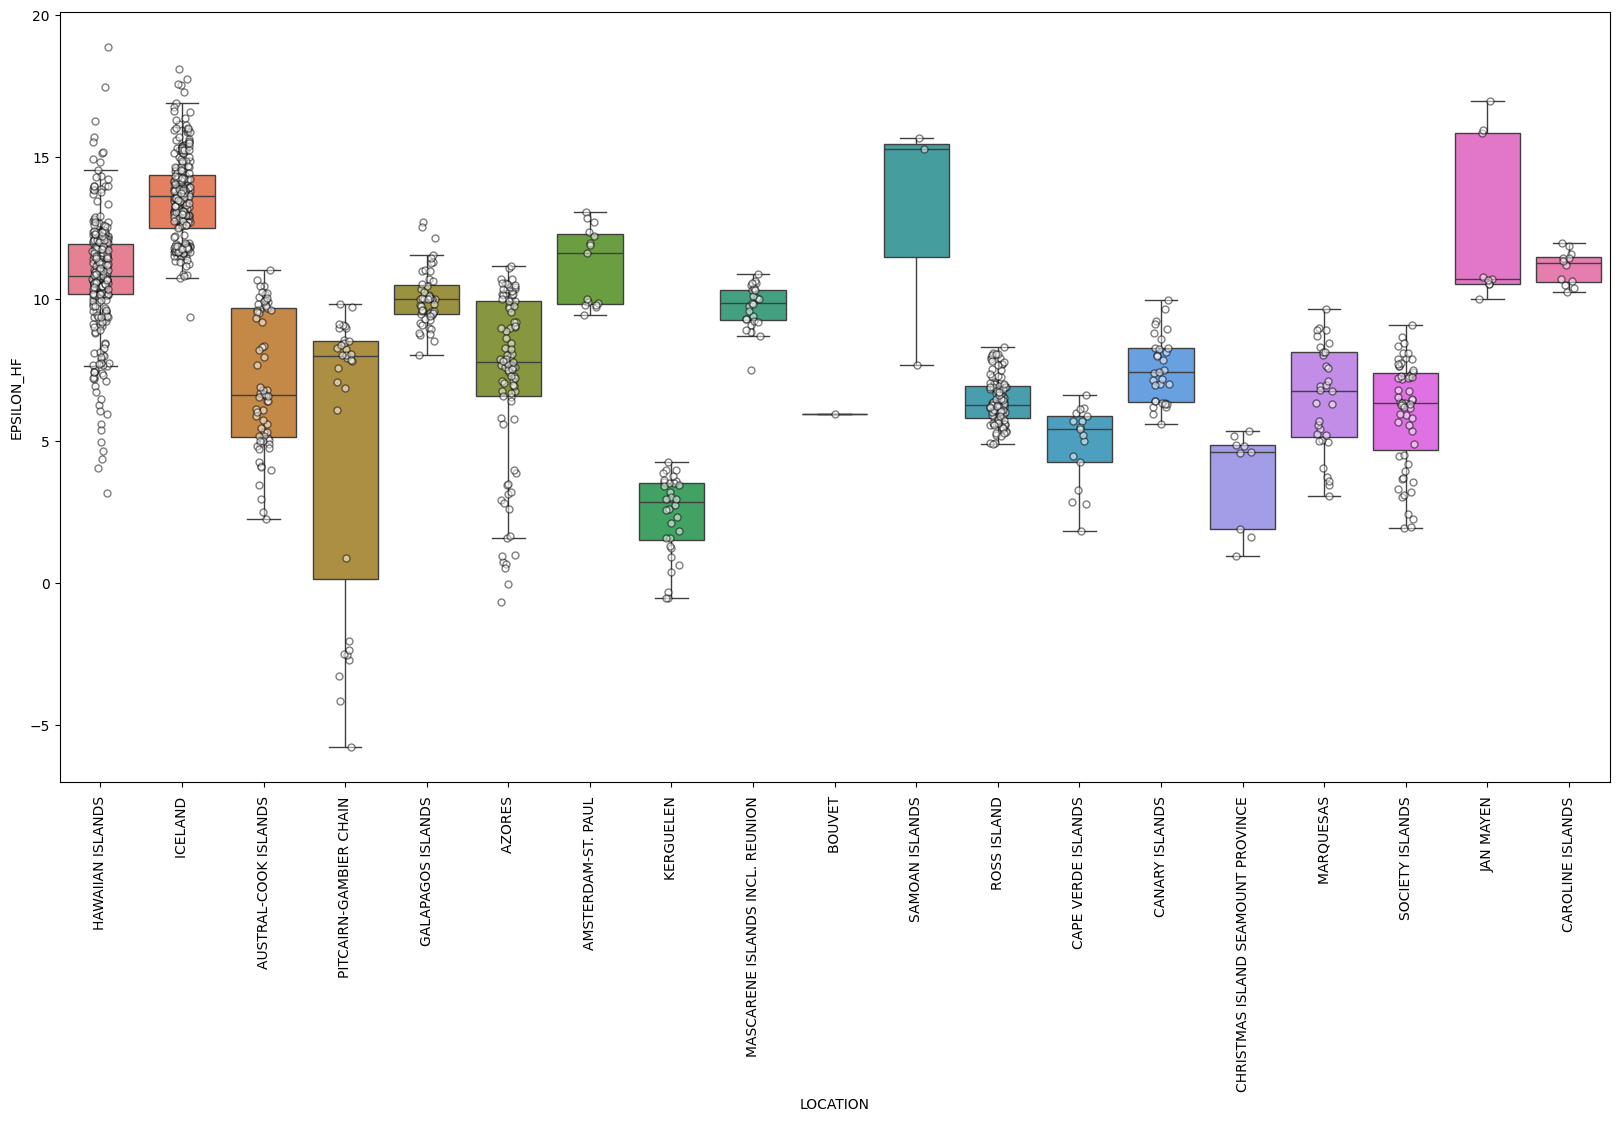

In [ ]:
plt.figure(figsize=(20,10))
box=sns.boxplot(data=MantleArray,x='LOCATION',y='EPSILON_HF',hue='LOCATION',fliersize=0)
plt.setp(box.get_xticklabels(), rotation=90);
#sns.swarmplot(data=MantleArray,x='LOCATION',y='EPSILON_HF',color='white',edgecolor='black',linewidth=1,alpha=0.5);
sns.stripplot(data=MantleArray,x='LOCATION',y='EPSILON_HF',color='white',edgecolor='black',linewidth=1,alpha=0.5);

Note that the white data points are adjusted to be non-overlapping.

Very nice!   Now you can see what the boxes are based on.   And you can see right away that the dots are not drawn from normal distributions!

Another way to visualize the same data is with a violin plot.  It is similar to a box and whisker plot, but shows the kernel density estimates instead of just a 'box'.   

In [ ]:
help(sns.violinplot)

Help on function violinplot in module seaborn.categorical:

violinplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, inner='box', split=False, width=0.8, dodge='auto', gap=0, linewidth=None, linecolor='auto', cut=2, gridsize=100, bw_method='scott', bw_adjust=1, density_norm='area', common_norm=False, hue_norm=None, formatter=None, log_scale=None, native_scale=False, legend='auto', scale=<deprecated>, scale_hue=<deprecated>, bw=<deprecated>, inner_kws=None, ax=None, **kwargs)
    Draw a patch representing a KDE and add observations or box plot statistics.

    A violin plot plays a similar role as a box-and-whisker plot. It shows the
    distribution of data points after grouping by one (or more) variables.
    Unlike a box plot, each violin is drawn using a kernel density estimate
    of the underlying distribution.

    See the :ref:`tutorial <categorical_tutorial>` for more information.

    .. n

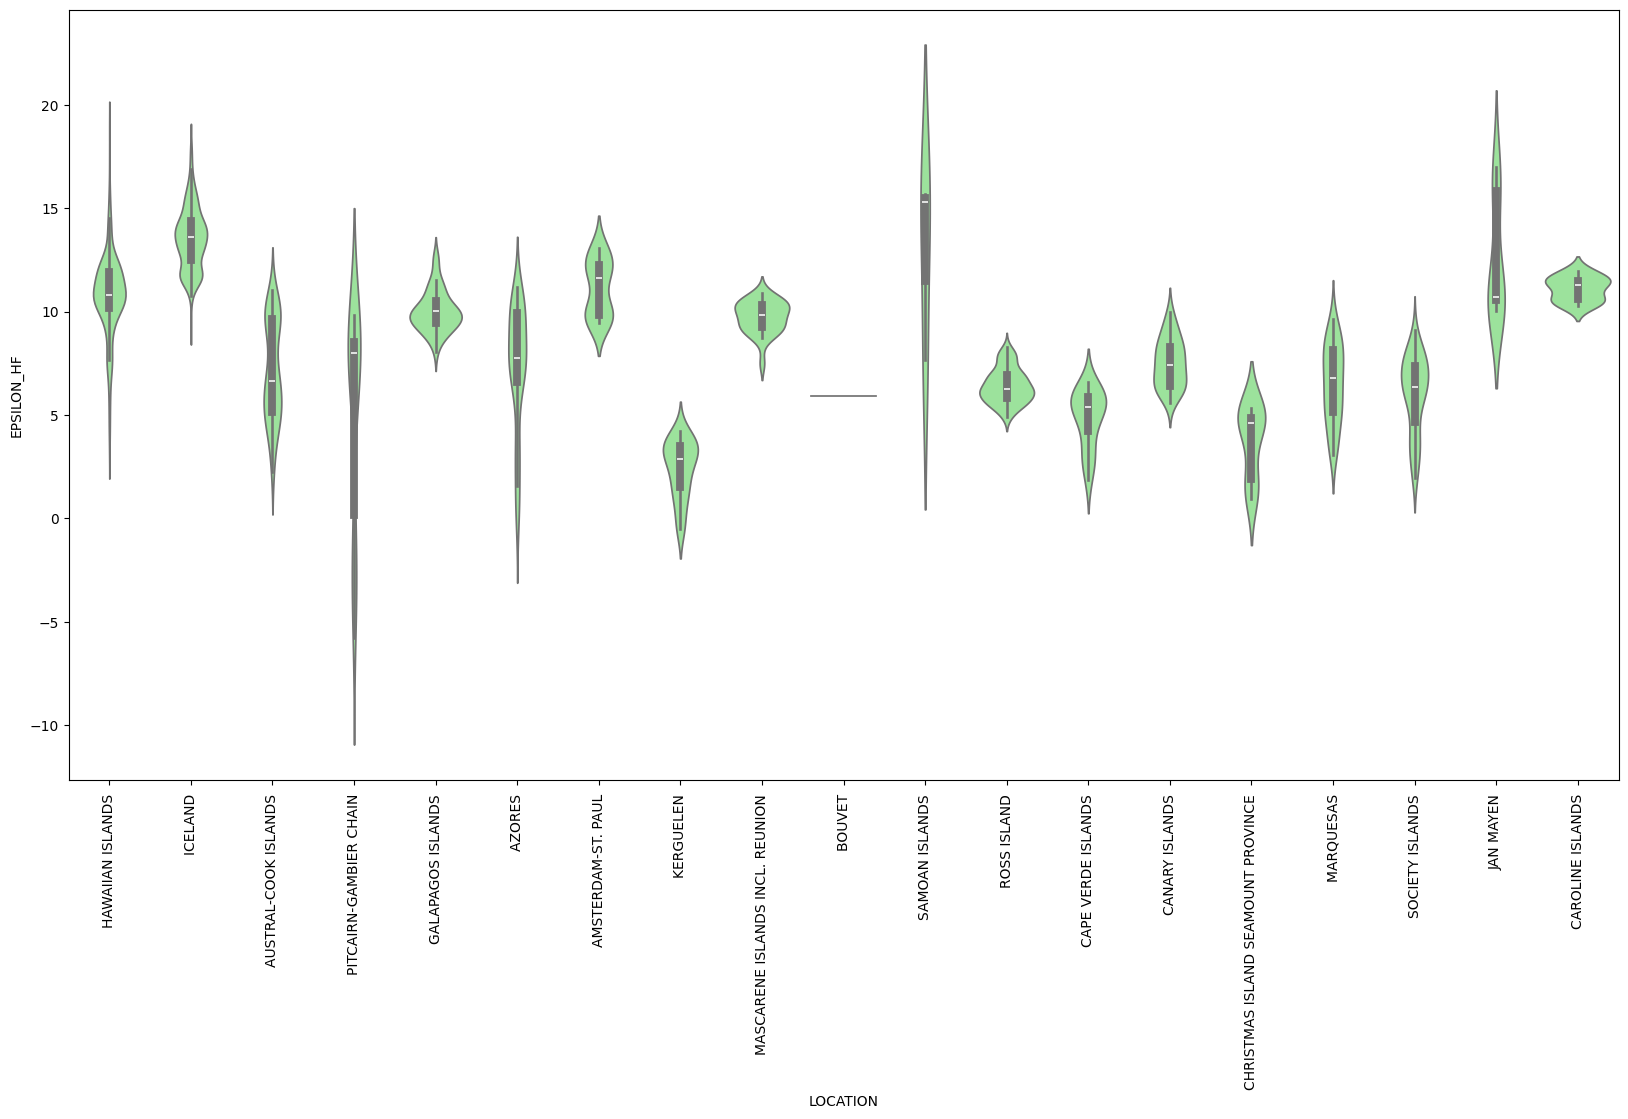

In [ ]:
plt.figure(figsize=(20,10))
violin=sns.violinplot(data=MantleArray,x='LOCATION',y='EPSILON_HF', color='lightgreen')
plt.setp(violin.get_xticklabels(), rotation=90);

The default violinplot represents a distribution two ways: a patch showing a symmetric kernel density estimate (KDE), and the quartiles / whiskers of a box plot.

And if you want to put all the data back on (not just the ones inside the violins:

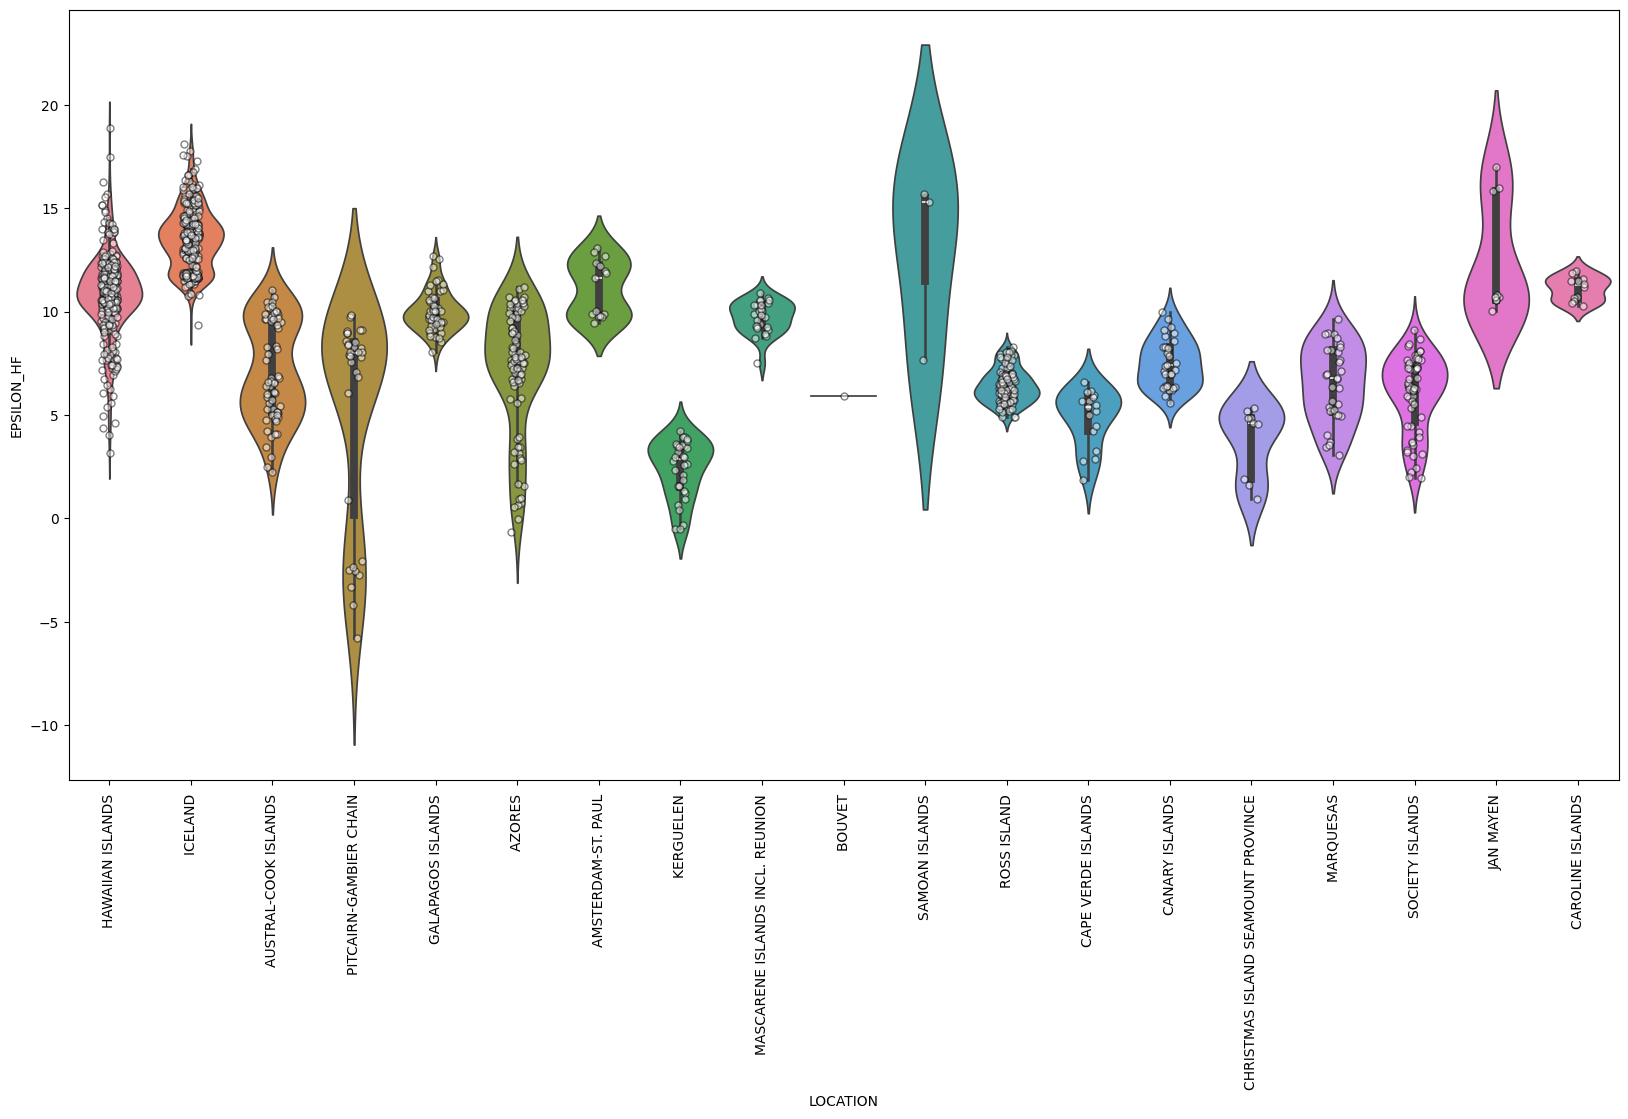

In [ ]:
plt.figure(figsize=(20,10))
violin=sns.violinplot(data=MantleArray,x='LOCATION',y='EPSILON_HF',hue='LOCATION')
plt.setp(violin.get_xticklabels(), rotation=90);
sns.stripplot(data=MantleArray,x='LOCATION',y='EPSILON_HF',color='white',edgecolor='black',linewidth=1,alpha=0.5);